<a href="https://colab.research.google.com/github/ambiflextrous/reports/blob/main/asian_session_effect_copper_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Analysis - Effect on Copper (Asian Session)**

In [2]:
# Install necessary packages (if not already installed)
install.packages(c("tidyverse", "rio", "lubridate"))
options(warn = -1)

library(tidyverse)
library(rio)
library(lubridate) # Make sure lubridate is installed

# Load the CSV file
data <- import("/content/copper_historical_hourly_2020_2024_data.xlsx")

# Data Cleaning and Type Conversion
data <- data %>%
  mutate(
    # 1. Convert snapshotTime to datetime, handling potential errors.
    snapshotTime = as.POSIXct(snapshotTime, format = "%Y-%m-%d %H:%M:%S"),

    # 2. Convert price columns to numeric (float) - with error protection
    openPrice = as.numeric(openPrice),
    highPrice = as.numeric(highPrice),
    lowPrice  = as.numeric(lowPrice),
    closePrice = as.numeric(closePrice)
  )

# Remove the snapshotTimeUTC column
data <- data %>%
  select(-snapshotTimeUTC)  # 1: remove snapshotTimeUTC

# Remove any duplicated dates in the snapshotTime
data <- data %>%
  distinct(snapshotTime, .keep_all = TRUE) # 2: Removed dups

# Extract date and hour from snapshotTime and add year, month columns
data <- data %>%
  mutate(
    date = as.Date(snapshotTime),         # Extract date
    hour = hour(snapshotTime),            # Extract hour
    year = year(snapshotTime),            # Extract year
    month = month(snapshotTime, label = TRUE, abbr = FALSE) # Extract month as a factor
  )



Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.oo’, ‘R.methodsS3’, ‘writexl’, ‘R.utils’


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Always plot everything

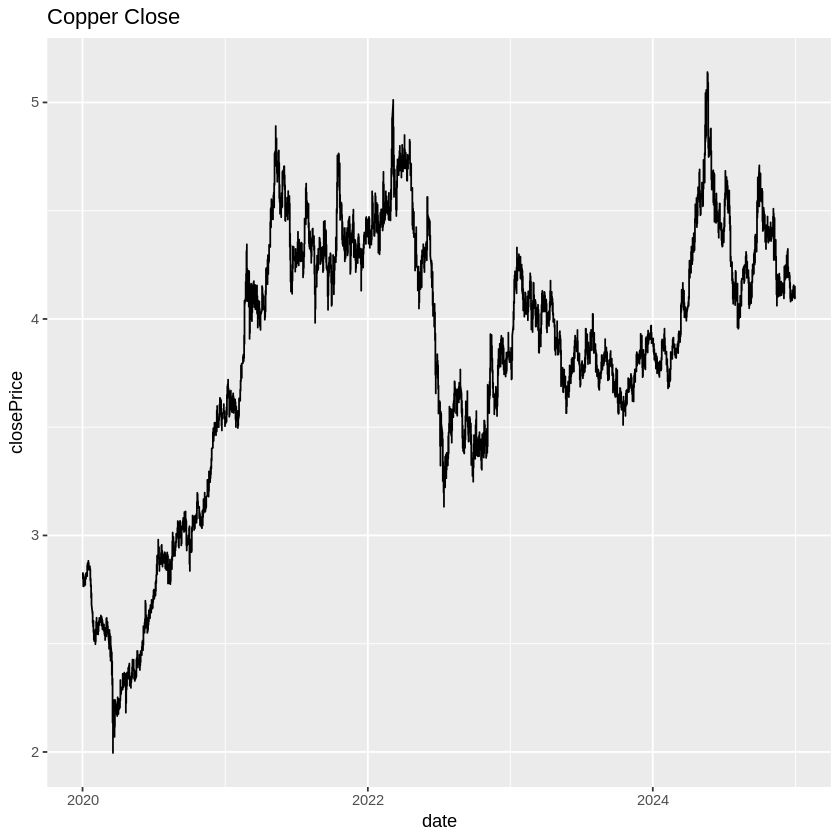

In [3]:
data %>%
  ggplot(aes(x=date, y=closePrice)) +
    geom_line() +
    ggtitle('Copper Close')

# Calculate hourly log returns

Since I'm working with the hourly timeframe, to check the effect on intraday data; the log returns are going to be hourly log returns.

In [4]:
data %>% head()

,snapshotTime,openPrice,highPrice,lowPrice,closePrice,date,hour,year,month
,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<int>,<dbl>,<ord>
1,2020-01-02 01:00:00,2.8065,2.8075,2.8050,2.8065,2020-01-02,1,2020,January
2,2020-01-02 02:00:00,2.8070,2.8100,2.8050,2.8100,2020-01-02,2,2020,January
3,2020-01-02 03:00:00,2.8105,2.8225,2.8100,2.8175,2020-01-02,3,2020,January
4,2020-01-02 04:00:00,2.8170,2.8210,2.8170,2.8205,2020-01-02,4,2020,January
5,2020-01-02 05:00:00,2.8210,2.8290,2.8210,2.8230,2020-01-02,5,2020,January
6,2020-01-02 06:00:00,2.8225,2.8230,2.8205,2.8205,2020-01-02,6,2020,January


In [5]:
data <- data %>%
  arrange(date) %>%
  mutate(logReturn = log(closePrice / lag(closePrice)))

data %>% head()

,snapshotTime,openPrice,highPrice,lowPrice,closePrice,date,hour,year,month,logReturn
,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<int>,<dbl>,<ord>,<dbl>
1,2020-01-02 01:00:00,2.8065,2.8075,2.8050,2.8065,2020-01-02,1,2020,January,NA
2,2020-01-02 02:00:00,2.8070,2.8100,2.8050,2.8100,2020-01-02,2,2020,January,0.0012463279
3,2020-01-02 03:00:00,2.8105,2.8225,2.8100,2.8175,2020-01-02,3,2020,January,0.0026654836
4,2020-01-02 04:00:00,2.8170,2.8210,2.8170,2.8205,2020-01-02,4,2020,January,0.0010642073
5,2020-01-02 05:00:00,2.8210,2.8290,2.8210,2.8230,2020-01-02,5,2020,January,0.0008859751
6,2020-01-02 06:00:00,2.8225,2.8230,2.8205,2.8205,2020-01-02,6,2020,January,-0.0008859751


# Group by hour of day and calculate the average returns

Eliminate the NA values on the log returns

In [6]:
data <- data %>%
	na.omit()

data %>% head()


,snapshotTime,openPrice,highPrice,lowPrice,closePrice,date,hour,year,month,logReturn
,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<int>,<dbl>,<ord>,<dbl>
2,2020-01-02 02:00:00,2.8070,2.8100,2.8050,2.8100,2020-01-02,2,2020,January,0.0012463279
3,2020-01-02 03:00:00,2.8105,2.8225,2.8100,2.8175,2020-01-02,3,2020,January,0.0026654836
4,2020-01-02 04:00:00,2.8170,2.8210,2.8170,2.8205,2020-01-02,4,2020,January,0.0010642073
5,2020-01-02 05:00:00,2.8210,2.8290,2.8210,2.8230,2020-01-02,5,2020,January,0.0008859751
6,2020-01-02 06:00:00,2.8225,2.8230,2.8205,2.8205,2020-01-02,6,2020,January,-0.0008859751
7,2020-01-02 07:00:00,2.8210,2.8250,2.8205,2.8250,2020-01-02,7,2020,January,0.0015941904


Since you've already calculated hourly log returns, the most direct parallel to "day of month" grouping would be to group by "hour of day"

In [7]:
# Group by hour of day and calculate average returns
hour_of_day_returns <- data %>%
  group_by(hour) %>%
  summarize(
    mean_log_returns = mean(logReturn, na.rm = TRUE),
    median_log_returns = median(logReturn, na.rm = TRUE)
  )

# Make sure hour is treated as a factor to display all hours
hour_of_day_returns$hour <- factor(hour_of_day_returns$hour,
                                  levels = 0:23)  # Ensure all 24 hours are shown

# Plot COPPER mean log returns by hour of day

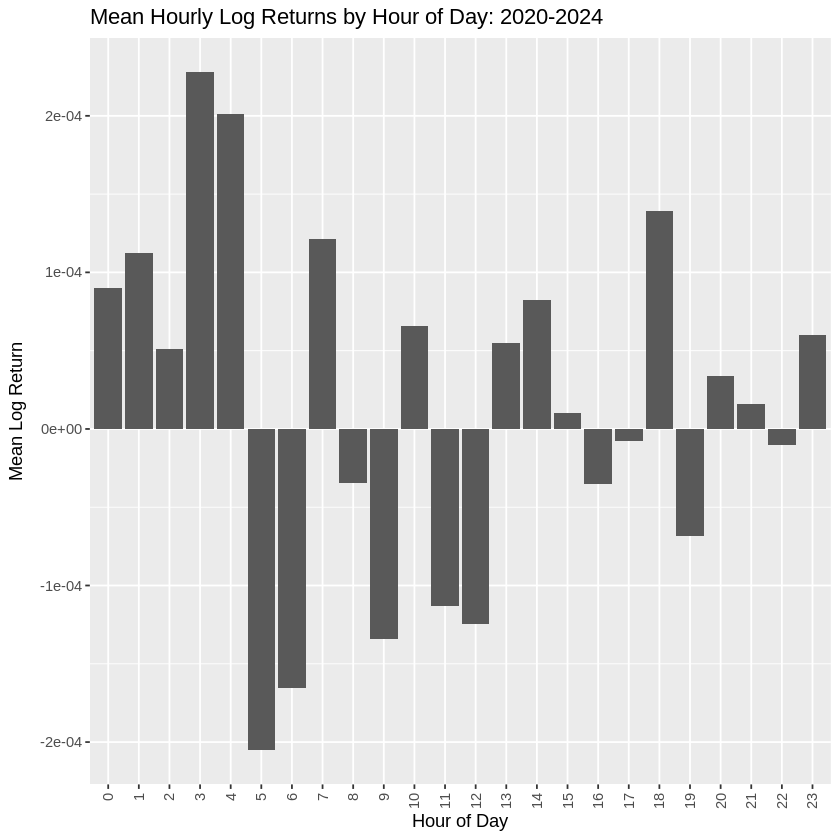

In [8]:
# Visualize average returns by hour of day
ggplot(hour_of_day_returns, aes(x = hour, y = mean_log_returns)) +
  geom_bar(stat='identity') +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1)) +  # Vertical x-axis labels
  labs(title = "Mean Hourly Log Returns by Hour of Day: 2020-2024",
       x = "Hour of Day",
       y = "Mean Log Return")

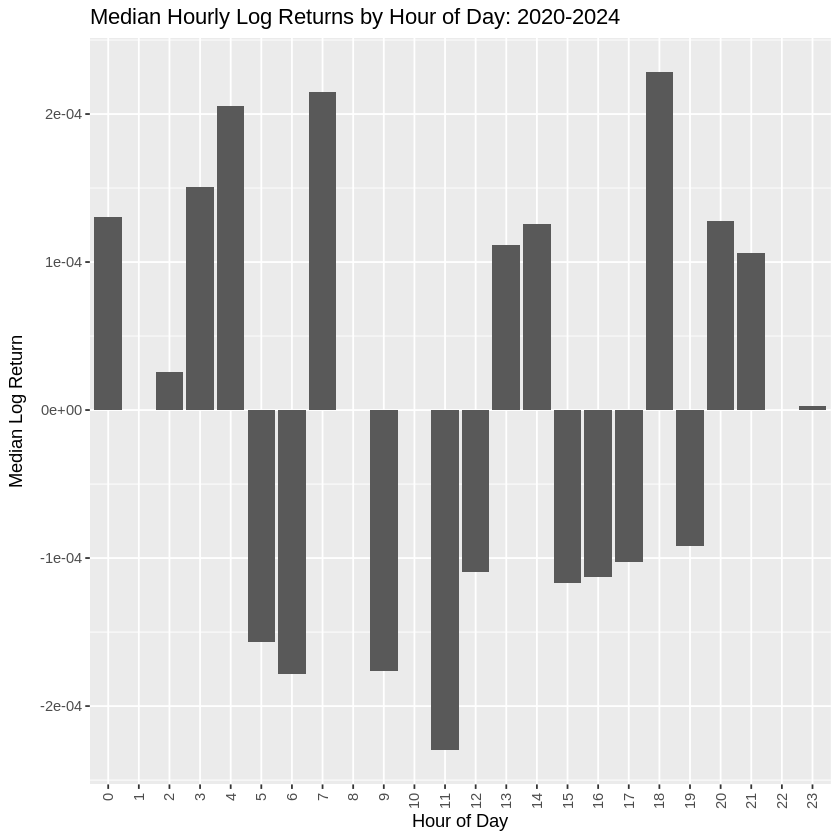

In [9]:
# Visualize average returns by hour of day
ggplot(hour_of_day_returns, aes(x = hour, y = median_log_returns)) +
  geom_bar(stat='identity') +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1)) +  # Vertical x-axis labels
  labs(title = "Median Hourly Log Returns by Hour of Day: 2020-2024",
       x = "Hour of Day",
       y = "Median Log Return")

# How stable is the effect across time?



##  Look at sub-periods

In [10]:
data %>% head()

,snapshotTime,openPrice,highPrice,lowPrice,closePrice,date,hour,year,month,logReturn
,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<int>,<dbl>,<ord>,<dbl>
2,2020-01-02 02:00:00,2.8070,2.8100,2.8050,2.8100,2020-01-02,2,2020,January,0.0012463279
3,2020-01-02 03:00:00,2.8105,2.8225,2.8100,2.8175,2020-01-02,3,2020,January,0.0026654836
4,2020-01-02 04:00:00,2.8170,2.8210,2.8170,2.8205,2020-01-02,4,2020,January,0.0010642073
5,2020-01-02 05:00:00,2.8210,2.8290,2.8210,2.8230,2020-01-02,5,2020,January,0.0008859751
6,2020-01-02 06:00:00,2.8225,2.8230,2.8205,2.8205,2020-01-02,6,2020,January,-0.0008859751
7,2020-01-02 07:00:00,2.8210,2.8250,2.8205,2.8250,2020-01-02,7,2020,January,0.0015941904


Split the period in 5 sub-periods.

In [11]:
data <- data %>%
  ungroup() %>%
  mutate(
    date_group = ntile(date, 5)
  )
# ntile(date, 5) splits data into 5 equal-sized groups by count. With 4 years of hourly data, each group gets ~7,008 observations, not equal time spans.

data %>%
  group_by(date_group) %>%
  summarize(min_date =  min(date), max_date = max(date))

date_group,min_date,max_date
<int>,<date>,<date>
1,2020-01-02,2020-12-31
2,2020-12-31,2021-12-31
3,2021-12-31,2022-12-30
4,2022-12-30,2024-01-02
5,2024-01-02,2024-12-31


In [12]:
data

,snapshotTime,openPrice,highPrice,lowPrice,closePrice,date,hour,year,month,logReturn,date_group
,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<int>,<dbl>,<ord>,<dbl>,<int>
2,2020-01-02 02:00:00,2.8070,2.8100,2.8050,2.8100,2020-01-02,2,2020,January,0.0012463279,1
3,2020-01-02 03:00:00,2.8105,2.8225,2.8100,2.8175,2020-01-02,3,2020,January,0.0026654836,1
4,2020-01-02 04:00:00,2.8170,2.8210,2.8170,2.8205,2020-01-02,4,2020,January,0.0010642073,1
5,2020-01-02 05:00:00,2.8210,2.8290,2.8210,2.8230,2020-01-02,5,2020,January,0.0008859751,1
6,2020-01-02 06:00:00,2.8225,2.8230,2.8205,2.8205,2020-01-02,6,2020,January,-0.0008859751,1
7,2020-01-02 07:00:00,2.8210,2.8250,2.8205,2.8250,2020-01-02,7,2020,January,0.0015941904,1
8,2020-01-02 08:00:00,2.8260,2.8260,2.8215,2.8220,2020-01-02,8,2020,January,-0.0010625112,1
9,2020-01-02 09:00:00,2.8225,2.8235,2.8200,2.8215,2020-01-02,9,2020,January,-0.0001771950,1
10,2020-01-02 10:00:00,2.8220,2.8300,2.8150,2.8225,2020-01-02,10,2020,January,0.0003543586,1


In [13]:
# hod = hour of day
hod_group_returns <- data %>%
  na.omit() %>%
  group_by(date_group, hour) %>%
  summarize(
    mean_log_returns = mean(logReturn),
    median_log_returns = median(logReturn)
  )

hod_group_returns %>% head()

`summarise()` has grouped output by 'date_group'. You can override using the
`.groups` argument.


date_group,hour,mean_log_returns,median_log_returns
<int>,<int>,<dbl>,<dbl>
1,0,-2.624189e-04,0.0003265306
1,1,5.584316e-05,0.0001743859
1,2,-3.962896e-05,0.0001505631
1,3,4.235308e-04,0.0001826124
1,4,2.378378e-04,0.0003368184
1,5,-4.607445e-05,0.0000000000


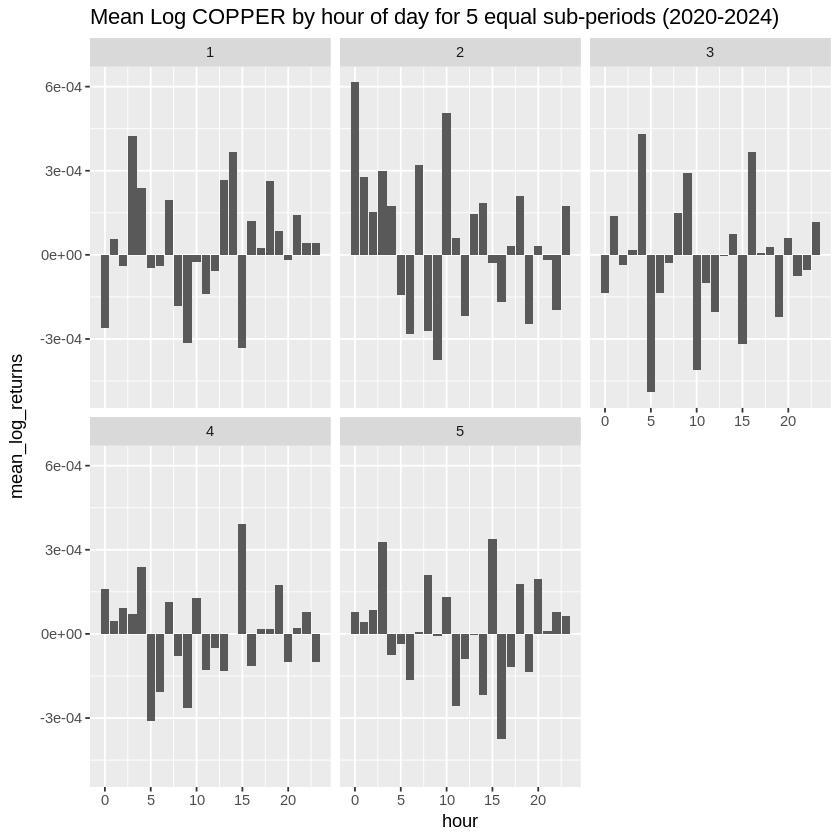

In [14]:
hod_group_returns %>%
  ggplot(aes(x=hour, y=mean_log_returns)) +
    geom_bar(stat='identity') +
    facet_wrap(~date_group) +
    ggtitle('Mean Log COPPER by hour of day for 5 equal sub-periods (2020-2024)')

Now do the same thing broken up by year.

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


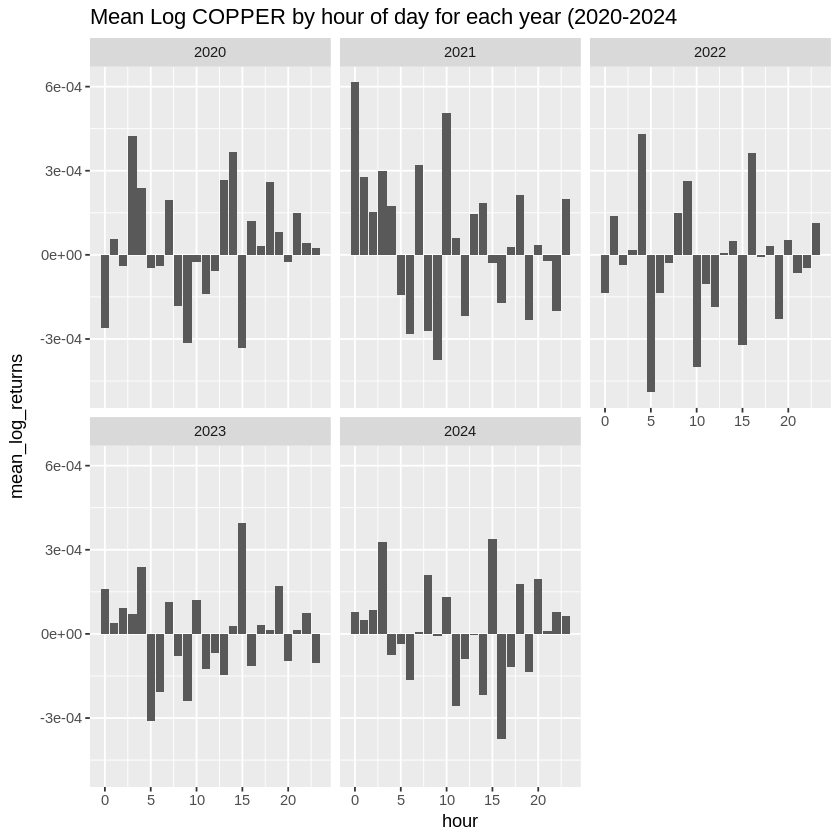

In [15]:
data %>%
  na.omit() %>%
  group_by(year, hour) %>%
  summarize(
    mean_log_returns = mean(logReturn),
    median_log_returns = median(logReturn)
  ) %>%
  ggplot(aes(x=hour, y=mean_log_returns)) +
    geom_bar(stat='identity') +
    facet_wrap(~year) +
    ggtitle('Mean Log COPPER by hour of day for each year (2020-2024)')

Now do the same thing broken up by month.

`summarise()` has grouped output by 'month'. You can override using the
`.groups` argument.


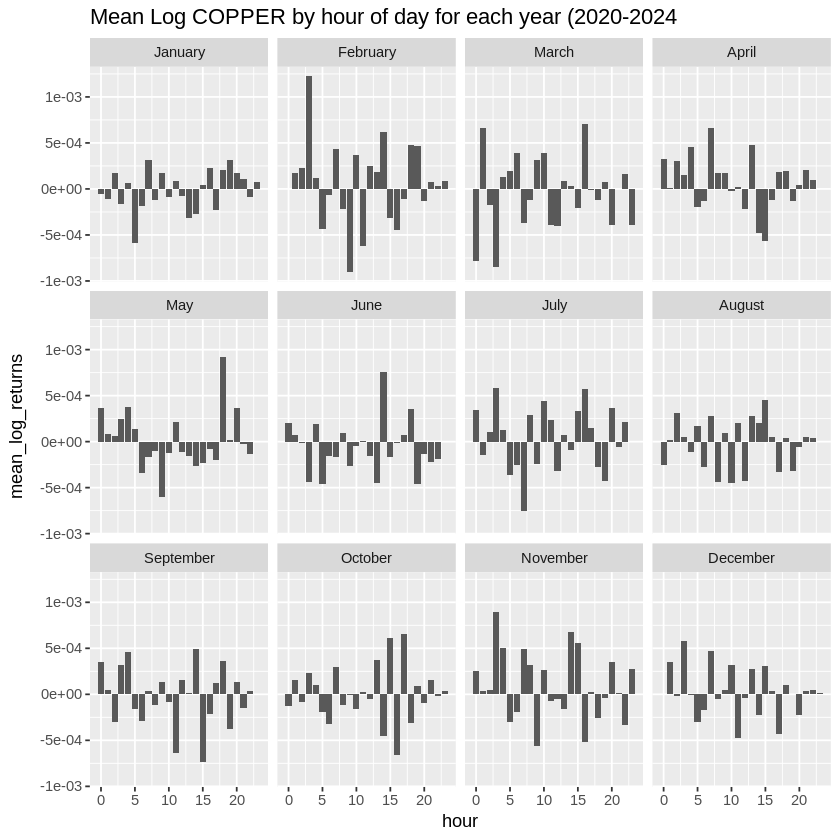

In [16]:
data %>%
  na.omit() %>%
  group_by(month, hour) %>%
  summarize(
    mean_log_returns = mean(logReturn),
    median_log_returns = median(logReturn)
  ) %>%
  ggplot(aes(x=hour, y=mean_log_returns)) +
    geom_bar(stat='identity') +
    facet_wrap(~month) +
    ggtitle('Mean Log COPPER by hour of day for each year (2020-2024)')

Now do the same thing broken up by weekday.

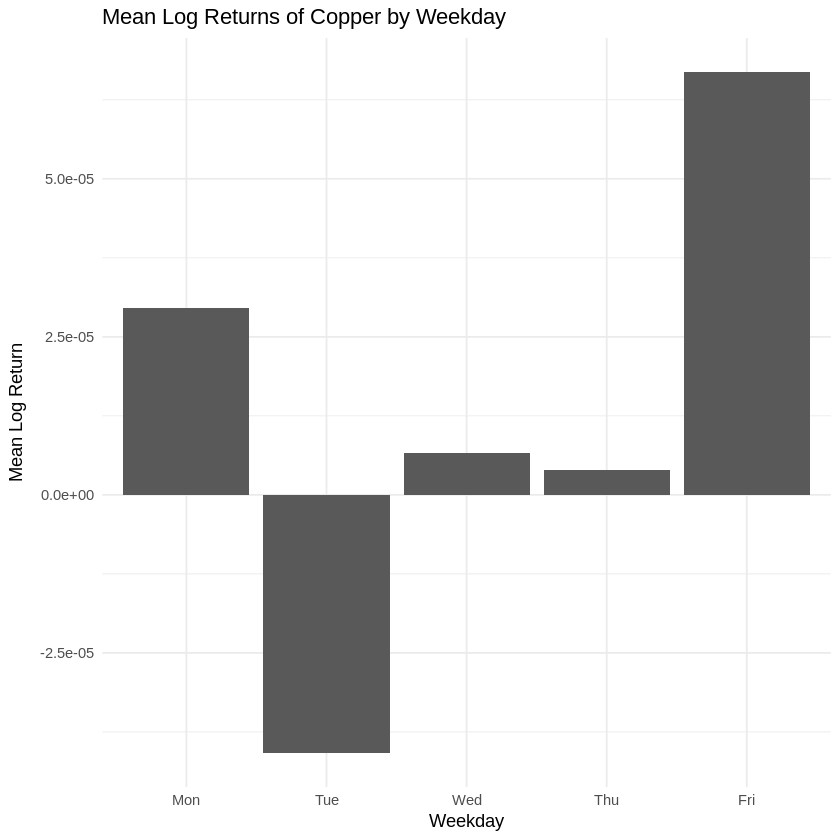

In [20]:
# Extract weekday from date
data <- data %>%
  mutate(weekday = wday(date, label = TRUE))  # Creates weekday as factor with labels


weekday_returns <- data %>%
  group_by(weekday) %>%
  summarize(
    mean_log_return = mean(logReturn, na.rm = TRUE),
    median_log_return = median(logReturn, na.rm = TRUE)
  )

# Visualize mean log returns by weekday
ggplot(weekday_returns, aes(x = weekday, y = mean_log_return)) +
  geom_bar(stat='identity') +
  labs(title = "Mean Log Returns of Copper by Weekday",
      x = "Weekday",
      y = "Mean Log Return") +
  theme_minimal()


# Cumulative Returns (Equity Curve)

# Could this just be a reward for taking on more risk?

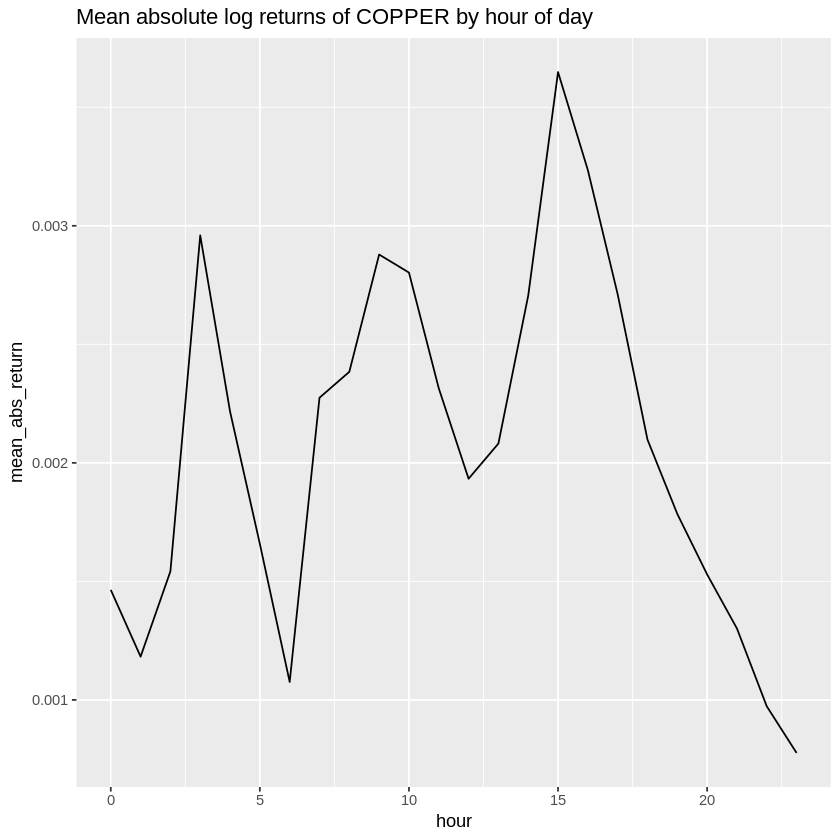

In [22]:
data %>%
  na.omit() %>%
  mutate(abs_return = abs(logReturn)) %>%
  group_by(hour) %>%
  summarize(mean_abs_return = mean(abs_return)) %>%
  ggplot(aes(x=hour, y=mean_abs_return)) + geom_line(stat='identity') + ggtitle('Mean absolute log returns of COPPER by hour of day')

# How Stable is the Effect Across Assets?

# Other Code I need to sort out

In [ ]:
extract_extrema <- function(df, price_type = c("high", "low")) {
    price_type <- match.arg(price_type)  # Ensure valid price type argument

    if(price_type == "high") {
        df %>%
            group_by(date) %>%
            filter(highPrice == max(highPrice)) %>%  # Get the high price
            slice_head(n = 1) %>%                    # If there are multiple maxes, take only the first
            mutate(
                time_of_day = format(snapshotTime, "%H:%M:%S"),
                weekday = wday(date, label = TRUE, abbr = FALSE),
                hour = hour(snapshotTime)
            ) %>%
            ungroup()
    } else {
        df %>%
            group_by(date) %>%
            filter(lowPrice == min(lowPrice)) %>%    # Get the low price
            slice_head(n = 1) %>%                    # If there are multiple mins, take only the first
            mutate(
                time_of_day = format(snapshotTime, "%H:%M:%S"),
                weekday = wday(date, label = TRUE, abbr = FALSE),
                hour = hour(snapshotTime)
            ) %>%
            ungroup()
    }
}

daily_high_times <- extract_extrema(data, "high")
daily_low_times <- extract_extrema(data, "low")

# -----Visualizations-----

# Function to create hourly distribution plots with faceting
create_hourly_distribution <- function(data_frame, price_type = "High", facet_var = NULL) {
  # Calculate proportions within each facet group
  if (!is.null(facet_var)) {
    prop_data <- data_frame %>%
      group_by(!!sym(facet_var), hour) %>%
      summarize(count = n(), .groups = "drop_last") %>%
      mutate(proportion = count / sum(count)) %>%
      ungroup()
  } else {
    prop_data <- data_frame %>%
      group_by(hour) %>%
      summarize(count = n(), .groups = "drop") %>%
      mutate(proportion = count / sum(count))
  }

  # Create the base plot
  p <- ggplot(prop_data, aes(x = hour, y = proportion)) +
    geom_col(fill = ifelse(price_type == "High", "skyblue", "lightcoral"), color = "black") +
    labs(
      title = paste("Distribution of Hours for Daily", price_type, "Price",
                   ifelse(!is.null(facet_var), paste("by", facet_var), "")),
      x = "Hour of Day",
      y = "Proportion"
    ) +
    theme_minimal() +
    scale_x_continuous(breaks = 0:23, labels = function(x) sprintf("%02d:00", x)) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5)) +
    scale_y_continuous(labels = scales::percent_format(accuracy = 1))

  # Add faceting if a facet variable is provided
  if (!is.null(facet_var)) {
    if (facet_var == "year") {
      p <- p + facet_wrap(~ year, ncol = 2)
    } else if (facet_var == "month") {
      p <- p + facet_wrap(~ month, ncol = 3)
    }
  }

  return(p)
}

# Add year and month to the extrema dataframes
daily_high_times <- daily_high_times %>%
  mutate(
    year = year(date),
    month = month(date, label = TRUE, abbr = FALSE)
  )

daily_low_times <- daily_low_times %>%
  mutate(
    year = year(date),
    month = month(date, label = TRUE, abbr = FALSE)
  )

# Create plots

# 1. Overall hourly distribution (same as before, but with improved formatting)
high_overall <- create_hourly_distribution(daily_high_times, "High")
low_overall <- create_hourly_distribution(daily_low_times, "Low")

# 2. By Year
high_by_year <- create_hourly_distribution(daily_high_times, "High", "year")
low_by_year <- create_hourly_distribution(daily_low_times, "Low", "year")

# 3. By Month
high_by_month <- create_hourly_distribution(daily_high_times, "High", "month")
low_by_month <- create_hourly_distribution(daily_low_times, "Low", "month")

# Display the plots
print(high_overall)
print(low_overall)
print(high_by_year)
print(low_by_year)
print(high_by_month)
print(low_by_month)

# For weekday distribution by different time periods
create_weekday_distribution <- function(data_frame, price_type = "High", facet_var = NULL) {
  # Calculate proportions within each facet group
  if (!is.null(facet_var)) {
    prop_data <- data_frame %>%
      group_by(!!sym(facet_var), weekday) %>%
      summarize(count = n(), .groups = "drop_last") %>%
      mutate(proportion = count / sum(count)) %>%
      ungroup()
  } else {
    prop_data <- data_frame %>%
      group_by(weekday) %>%
      summarize(count = n(), .groups = "drop") %>%
      mutate(proportion = count / sum(count))
  }

  # Create the base plot
  p <- ggplot(prop_data, aes(x = weekday, y = proportion)) +
    geom_col(fill = ifelse(price_type == "High", "skyblue", "lightcoral"), color = "black") +
    labs(
      title = paste("Distribution of Weekdays for Daily", price_type, "Price",
                   ifelse(!is.null(facet_var), paste("by", facet_var), "")),
      x = "Day of Week",
      y = "Proportion"
    ) +
    theme_minimal() +
    scale_y_continuous(labels = scales::percent_format(accuracy = 1))

  # Add faceting if a facet variable is provided
  if (!is.null(facet_var)) {
    if (facet_var == "year") {
      p <- p + facet_wrap(~ year, ncol = 2)
    } else if (facet_var == "month") {
      p <- p + facet_wrap(~ month, ncol = 3)
    }
  }

  return(p)
}

# Create weekday distribution plots
high_weekday_overall <- create_weekday_distribution(daily_high_times, "High")
low_weekday_overall <- create_weekday_distribution(daily_low_times, "Low")

high_weekday_by_year <- create_weekday_distribution(daily_high_times, "High", "year")
low_weekday_by_year <- create_weekday_distribution(daily_low_times, "Low", "year")

high_weekday_by_month <- create_weekday_distribution(daily_high_times, "High", "month")
low_weekday_by_month <- create_weekday_distribution(daily_low_times, "Low", "month")

# Display the weekday distribution plots
print(high_weekday_overall)
print(low_weekday_overall)
print(high_weekday_by_year)
print(low_weekday_by_year)
print(high_weekday_by_month)
print(low_weekday_by_month)